1. УРАВНЕНИЕ ПАРНОЙ РЕГРЕССИИ
Уравнение регрессии: Y = -5.3455 + 1.7081 * X
Свободный член (b0): -5.3455
Коэффициент при X (b1): 1.7081

2. ПОКАЗАТЕЛИ КАЧЕСТВА МОДЕЛИ
Коэффициент детерминации R²: 0.7949
Стандартная ошибка оценки (SEE): 2.1374
Средняя ошибка аппроксимации (MAPE): 13.69%
Общая сумма квадратов (TSS): 111.3571
Объясненная сумма квадратов (ESS): 88.5143
Сумма квадратов остатков (RSS): 22.8428

3. ДЕТАЛЬНАЯ СТАТИСТИКА МОДЕЛИ
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     19.37
Date:                Tue, 25 Nov 2025   Prob (F-statistic):            0.00701
Time:                        09:14:55   Log-Likelihood:                -14.072
No. Observations:                   7   AIC:                             32.14
Df Resi

/home/fampkin/Desktop/ML/venv/lib/python3.13/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


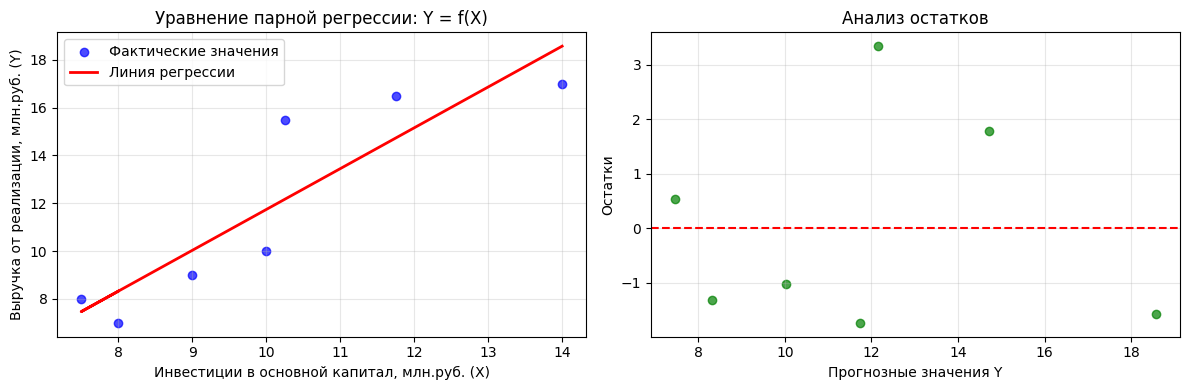


4. ТАБЛИЦА РАСЧЕТОВ
       X  Y_факт  Y_прогноз  Остатки  |Остаток/Y|%
0   8.00     7.0     8.3190  -1.3190       18.8430
1   7.50     8.0     7.4650   0.5350        6.6878
2   9.00     9.0    10.0271  -1.0271       11.4119
3  10.00    10.0    11.7351  -1.7351       17.3514
4  10.25    15.5    12.1622   3.3378       21.5345
5  11.75    16.5    14.7242   1.7758       10.7621
6  14.00    17.0    18.5674  -1.5674        9.2200


In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

Y = np.array([7, 8, 9, 10, 15.5, 16.5, 17])
X = np.array([8, 7.5, 9, 10, 10.25, 11.75, 14])

df = pd.DataFrame({'Y': Y, 'X': X})

X_reshaped = X.reshape(-1, 1)
model = LinearRegression()
model.fit(X_reshaped, Y)

b0 = model.intercept_
b1 = model.coef_[0]

print("1. УРАВНЕНИЕ ПАРНОЙ РЕГРЕССИИ")
print(f"Уравнение регрессии: Y = {b0:.4f} + {b1:.4f} * X")
print(f"Свободный член (b0): {b0:.4f}")
print(f"Коэффициент при X (b1): {b1:.4f}")

Y_pred = model.predict(X_reshaped)

residuals = Y - Y_pred

TSS = np.sum((Y - np.mean(Y))**2)  
RSS = np.sum(residuals**2)         
ESS = TSS - RSS                    

R2 = 1 - RSS/TSS
R2_sklearn = r2_score(Y, Y_pred)

n = len(Y)
k = 1 
SEE = np.sqrt(RSS / (n - k - 1))

MAPE = np.mean(np.abs(residuals / Y)) * 100

print("\n2. ПОКАЗАТЕЛИ КАЧЕСТВА МОДЕЛИ")
print(f"Коэффициент детерминации R²: {R2:.4f}")
print(f"Стандартная ошибка оценки (SEE): {SEE:.4f}")
print(f"Средняя ошибка аппроксимации (MAPE): {MAPE:.2f}%")
print(f"Общая сумма квадратов (TSS): {TSS:.4f}")
print(f"Объясненная сумма квадратов (ESS): {ESS:.4f}")
print(f"Сумма квадратов остатков (RSS): {RSS:.4f}")

X_with_const = sm.add_constant(X)
model_sm = sm.OLS(Y, X_with_const)
results = model_sm.fit()

print("\n3. ДЕТАЛЬНАЯ СТАТИСТИКА МОДЕЛИ")
print(results.summary())

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.scatter(X, Y, color='blue', label='Фактические значения', alpha=0.7)
plt.plot(X, Y_pred, color='red', linewidth=2, label='Линия регрессии')
plt.xlabel('Инвестиции в основной капитал, млн.руб. (X)')
plt.ylabel('Выручка от реализации, млн.руб. (Y)')
plt.title('Уравнение парной регрессии: Y = f(X)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.scatter(Y_pred, residuals, color='green', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Прогнозные значения Y')
plt.ylabel('Остатки')
plt.title('Анализ остатков')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

results_df = pd.DataFrame({
    'X': X,
    'Y_факт': Y,
    'Y_прогноз': Y_pred,
    'Остатки': residuals,
    '|Остаток/Y|%': np.abs(residuals / Y) * 100
})

print("\n4. ТАБЛИЦА РАСЧЕТОВ")
print(results_df.round(4))